In [0]:
import tensorflow as tf

In [2]:
from keras.models import Sequential


Using TensorFlow backend.


In [0]:
from keras.layers import Dense, Dropout, Flatten


In [0]:
from keras.datasets import mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train/255 
x_test = x_test/255

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
model =Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


W0630 08:54:02.054809 140500729001856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 08:54:02.080374 140500729001856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 08:54:02.094207 140500729001856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 08:54:02.113290 140500729001856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0630 08:54:02.125042 

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



W0630 08:54:02.163368 140500729001856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 08:54:02.194626 140500729001856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:

model.fit(x_train, y_train, epochs=5)


W0630 08:54:02.303280 140500729001856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.2208 - acc: 0.9345
Epoch 2/5
60000/60000 [==============================] - 17s 278us/step - loss: 0.0959 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.0677 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 17s 286us/step - loss: 0.0529 - acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 17s 277us/step - loss: 0.0438 - acc: 0.9857


In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08231866377908736
Test accuracy: 0.9769


In [0]:
### Use plot to visualize dataset

In [0]:
import matplotlib.pyplot as plt

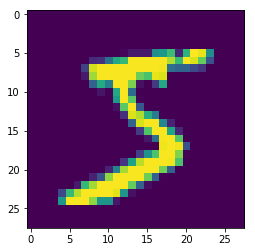

In [15]:
plt.figure()
plt.imshow(x_train[0])
plt.show()

([], <a list of 0 Text yticklabel objects>)

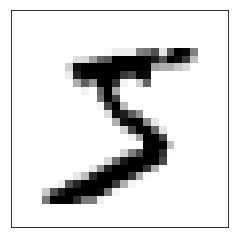

In [16]:
plt.imshow(x_train[0] , cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])


In [17]:
#Confusion matrix
test_predictions = model.predict_classes(x_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,test_predictions)
print(cm)

[[ 968    1    1    1    2    1    1    2    2    1]
 [   0 1126    4    0    0    1    1    0    3    0]
 [   6    3 1002    4    2    0    1    7    6    1]
 [   1    0    3  986    0    7    0    7    5    1]
 [   2    0    4    0  969    0    3    1    0    3]
 [   2    0    0    5    4  869    2    3    5    2]
 [   2    3    0    1    9    2  938    0    3    0]
 [   1    7    8    0    2    0    0 1007    1    2]
 [   6    1    1    2    6    1    0    2  952    3]
 [   2    6    0    3   21    5    0   15    5  952]]


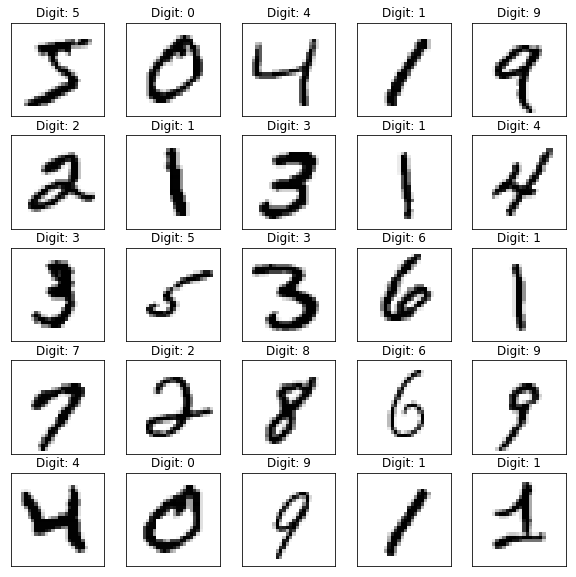

In [18]:
#Plot some Train Data 
plt.figure(figsize=(10,10))

for i in range(25): 
    plt.subplot(5,5,i+1) 
    #plt.tight_layout()

    
    plt.title("Digit: {}".format(y_train[i]))

    plt.xticks([])

    plt.yticks([])
    plt.imshow(x_train[i] , cmap=plt.cm.binary)

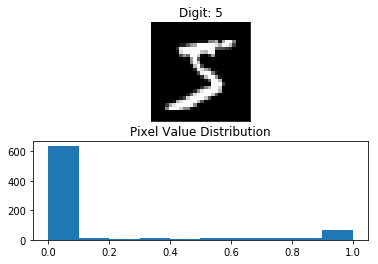

In [19]:
# See Pixel value Distribution

plt.figure()

plt.subplot(2,1,1)

plt.imshow(x_train[0], cmap='gray', interpolation='none')

plt.title("Digit: {}".format(y_train[0]))

plt.xticks([])

plt.yticks([])

plt.subplot(2,1,2)

plt.hist(x_train[0].reshape(784))

plt.title("Pixel Value Distribution") 
plt.show()

In [0]:
#Correct and Incorrect classification

In [22]:
import numpy as np
correct_indices = np.nonzero(test_predictions  == y_test)[0] 
incorrect_indices = np.nonzero(test_predictions  != y_test)[0] 
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")

9769  classified correctly
231  classified incorrectly


In [23]:
# value test code only 

np.nonzero(test_predictions  == y_test)[0]

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [24]:
len(np.nonzero(test_predictions  == y_test)[0])  ## Takke only True values

9769